# Bitácora de Laboratorio: Torque Magnético
**Curso:** Laboratorio Intermedio de Física  
**Fecha:** 2025-09-03  
**Integrantes:** Ángela Bustos y  Mariana Montoya. 

---
## Objetivos
- Medir el momento magnético usando métodos estáticos y dinámicos.
- Observar precesión y resonancia magnética.
- Comparar resultados con el modelo teórico.

---
## Marco Teórico (resumen mínimo)
Torque sobre dipolo: $\vec{\tau}=\vec{\mu}\times\vec{B}$.  
Fuerza en campo no uniforme: $\vec{F}=(\vec{\mu}\cdot\nabla)\vec{B}$.  
Pequeñas oscilaciones: $T^2=\dfrac{4\pi^2 I}{\mu B}$.  
Precesión: $\Omega=\dfrac{\mu B}{L_s}$.

---
## Montaje (breve)
Arreglo de bobinas, unidad de control, estroboscopio, bola de resina con imán.


<p align="center">
  <img src="montaje.jpg" alt="Mi imagen" width="600">
</p>

---
## Datos iniciales 

In [44]:
"""m_bolita = 141.3 #g
m_pesa = 1.5 #g
d_varilla = 9.71 #cm
r_bolita = 4.81/2 #cm
l_manija= 0.82 #cm
g = 9.80665

err_pie_rey = 0.05*10e-3 #mm
err_unidad = 0.5 #Amperes
err_tiempo= 0.01 #segundos
err_pesa = 0.1 #g"""

m_bolita = 141.3 * 1e-3          # kg  -> 0.1413
m_pesa   = 1.5   * 1e-3          # kg  -> 0.0015
d_varilla = 9.71 * 1e-2          # m   -> 0.0971
r_bolita  = (4.81/2) * 1e-2      # m   -> 0.02405
l_manija  = 0.82 * 1e-2          # m   -> 0.0082
g = 9.80665                      # m/s^2 (ya SI)

# Incertidumbres en SI
err_pie_rey = 0.05 * 1e-3        # m   (0.05 mm = 5e-5 m)
err_unidad  = 0.5                # A
err_tiempo  = 0.01               # s
err_pesa    = 0.1 * 1e-3         # kg  (0.1 g = 1e-4 kg)


In [32]:
import numpy as np
import matplotlib.pyplot as plt


---
## Actividad 1: Equilibrio estático
Relación esperada: $\mu B = rmg + dMg$.  
Ingresar mediciones (m, r, B) para varias posiciones o distintos r. Calcular $rmg$ y graficar vs. $B$.

In [47]:
l_peso = np.array([5.04, 5.77, 1.33, 2.35, 0, 2.62, 3.7])*10e-3+l_manija +r_bolita  # m
I_palo = np.array([3.1, 3.3, 2.3, 2.5, 2.1, 2.6, 2.8])  # A

k_BI = 1.36e-3   # T/A
B = k_BI * I_palo
x = B

y = l_peso * m_pesa * g
err_y = np.sqrt((m_pesa*g*err_pie_rey)**2 + (l_peso*g*err_pesa)**2)
err_B = k_BI * err_unidad


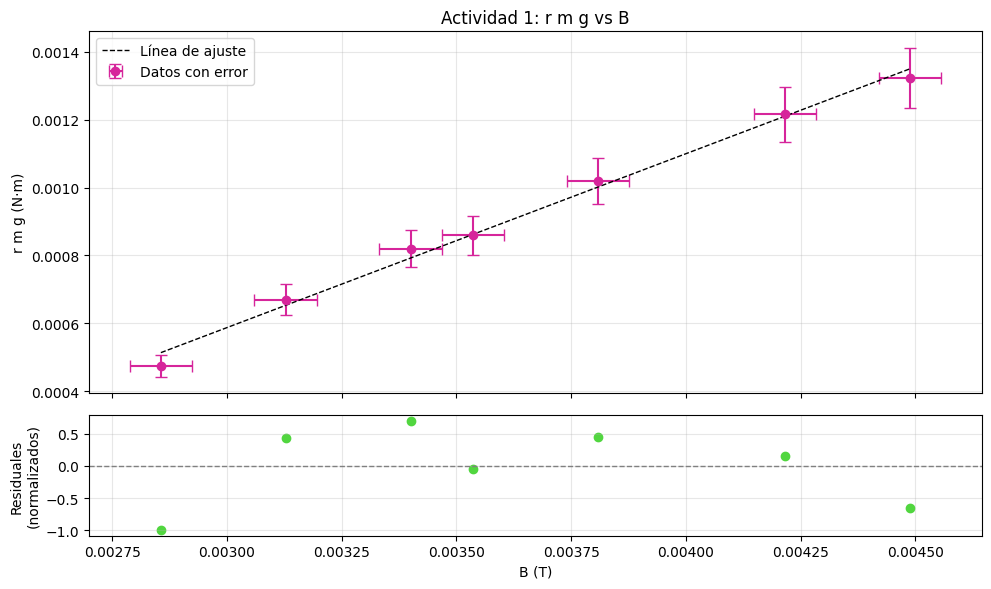

In [48]:
# --- AJUSTE LINEAL + COVARIANZA ---
coef, cov = np.polyfit(x, y, 1, cov=True)
mfit, bfit = coef
smfit, sbfit = np.sqrt(np.diag(cov))

x_ajuste = np.linspace(x.min(), x.max(), 200)
y_ajuste = mfit * x_ajuste + bfit

# --- RESIDUALES ---
residuales = y - (mfit * x + bfit)


max_abs_res = np.max(np.abs(residuales))
if max_abs_res == 0:
    residuales_norm = np.zeros_like(residuales)
    err_res_norm = np.zeros_like(err_y)
else:
    residuales_norm = residuales / max_abs_res
    err_res_norm = err_y / max_abs_res

# --- PLOTS ---
color_n1 = "#D6259B"
color_n2 = "#51D63F"

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(10, 6), sharex=True,
    gridspec_kw={"height_ratios": [3, 1]}
)


ax1.set_title("Actividad 1: r m g vs B")
ax1.set_ylabel("r m g (N·m)")
ax1.grid(True, alpha=0.3)

ax1.errorbar(x, y, xerr=err_B*10e-2, yerr=err_y,
             fmt="o", capsize=4, color=color_n1, label="Datos con error")
ax1.plot(x_ajuste, y_ajuste, "--", linewidth=1, color="black", label="Línea de ajuste")
ax1.legend()

ax2.set_xlabel("B (T)")
ax2.set_ylabel("Residuales\n(normalizados)")
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.scatter(x, residuales_norm, color=color_n2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [49]:
print(f"Pendiente = {mfit:.3e} ± {smfit:.3e}")
print(f"Intercepto = {bfit:.3e} ± {sbfit:.3e}")


Pendiente = 5.119e-01 ± 1.896e-02
Intercepto = -9.480e-04 ± 6.965e-05


---
### Conclusiones preliminares 

Se graficó  utilizando  B y rmg . En un primer momento, para B se utilizó k_B (T/A),dado por la guía y que se entiende que es obtenido de forma experimental, e I (A), medido de forma experimental para diferentes puntos de equilibrio, para obtener la ecuación del campo magnético de la forma: 

$$
B =  k_B * I 
$$

Luego se pudo ver un error asociado de la forma : 

$$
\Delta B = k_B *  \Delta I
$$

luego para tener el valor  de rmg, se multiplicó por la gravedad terrestre a la masa peso ,generador de torque, y a la longitud de la varilla desde la manija negra más el radio de la esfera y la manija negra. Considerando un error asociado de la forma: 
$$

\sigma_d =
\sqrt{
\left(\frac{\partial d}{\partial b}\sigma_b\right)^2 +
\left(\frac{\partial d}{\partial M}\sigma_M\right)^2 
}

$$


Luego del ajuste, se pudo ver un comportamiento lineal esperado debido a que estos están relacionados por el equilibrio dado por la ecuación 4 de la guía y descrito al inicio de esta actividad. 

Como resultado, se obtuvo un momento magnético con un valor de 5.11x10^-1+- 1.89 x10^-02  y el intercepto de -9.48x10 ^-4 +- 6.96e^-5 valores cercanos al valor esperado. 




---
## Actividad 2: Oscilación armónica
Relación esperada: $T^2 = \dfrac{4\pi^2 I}{\mu B}$.  
Ingresar mediciones (I, T, B) siendo I variado por uno mismo. Graficar $T^2$ vs $1/B$ y ajustar línea: pendiente $=\dfrac{4\pi^2 I}{\mu}$.


In [50]:
I = np.array([1,1.2,1.3,1.4,1.6,1.15,1.25,1.35,1.45,1.5]) #Amperes
t = np.array([30.64,28.69,28.49,27.28,31.40,30.24,29.10,28.02,27.28,26.9]) #segundos

In [ ]:
f = 3.8 #Hz frecuencia dada por el electrodoscopio
I = [1,1.5,2,2.5,3,3.5,4] # Amperes
T = [10.27, 7.63,4.81, 3.55, 2.51, 1.91, 1.72 ] # segundos 

---
## Actividad 3: Precesión
Relación esperada: $\Omega = \dfrac{\mu B}{L_s}$.  
Graficar $\Omega$ vs $B$; pendiente $=\mu/L_s$.


Pendiente (μ/Ls) = 1.089494e+04 ± 7.27e+02 [s^-1·T^-1]
Intercepto = -7.298241e-01 ± 1.96e-01 [s^-1]
L_s no definido: sólo podemos reportar μ/L_s (pendiente).


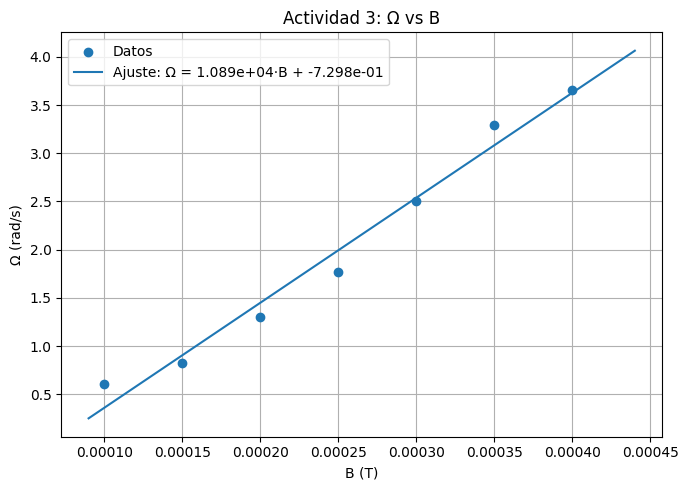

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# --- Datos (usa los tuyos) ---
f = 3.8
I3 = np.array([1,1.5,2,2.5,3,3.5,4])
Tprec = np.array([10.27, 7.63, 4.81, 3.55, 2.51, 1.91, 1.72])

# Constantes a editar:
k_BI = 1e-4   # <-- EDITA: factor que convierte corriente (A) a B (T). Ej: k_BI = μ0*n/2R etc.
L_s = None    # <-- SI LO CONOCES, pon un valor (kg·m^2/s). Si no, déjalo None.

# Cálculos
B3 = k_BI * I3
Omega = 2*np.pi / Tprec  # rad/s

# Ajuste lineal (pendiente m, intercepto b) con covarianza
# y errores (desviaciones estándar) usando np.polyfit con cov=True
p, cov = np.polyfit(B3, Omega, 1, cov=True)
mfit3, bfit3 = p
smfit3 = np.sqrt(cov[0,0])
sbfit3 = np.sqrt(cov[1,1])

# Imprime resultados del ajuste
print(f"Pendiente (μ/Ls) = {mfit3:.6e} ± {smfit3:.2e} [s^-1·T^-1]")
print(f"Intercepto = {bfit3:.6e} ± {sbfit3:.2e} [s^-1]")

# Si conoces L_s, calcula mu y su incertidumbre
if L_s is not None:
    mu_est = mfit3 * L_s
    dmu = smfit3 * L_s
    print(f"μ = {mu_est:.6e} ± {dmu:.2e} A·m^2 (con L_s = {L_s})")
else:
    print("L_s no definido: sólo podemos reportar μ/L_s (pendiente).")

# Graficar
xx = np.linspace(B3.min()*0.9, B3.max()*1.1, 200)
fit_line = mfit3 * xx + bfit3

plt.figure(figsize=(7,5))
plt.scatter(B3, Omega, label="Datos", zorder=5)
plt.plot(xx, fit_line, label=f"Ajuste: Ω = {mfit3:.3e}·B + {bfit3:.3e}", zorder=4)
plt.xlabel("B (T)")
plt.ylabel("Ω (rad/s)")
plt.title("Actividad 3: Ω vs B")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# (Opcional) Si prefieres trazar la 'línea teórica' para un μ supuesto:
# mu_supuesto = 1e-3  # ejemplo
# if L_s is not None:
#     plt.plot(xx, (mu_supuesto/L_s)*xx, '--', label=f"Teórica (μ={mu_supuesto})")




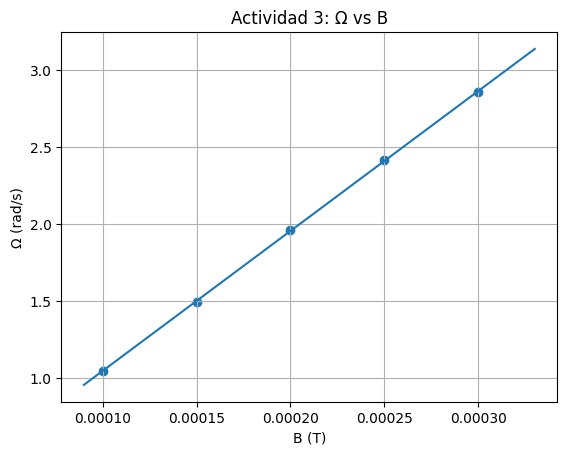

Pendiente = 9.0764e+03 ± 5.2e+01  [s^-1·T^-1]
μ (Actividad 3) ≈ 1.8153e+01 ± 1.0e-01 A·m^2 (con Ls asumido=0.002)


In [79]:
# ==== Datos de Actividad 3 (edita con tus medidas) ====
# Corriente (A) y periodos de precesión (s)
def fit_line(x, y):
    p, cov = np.polyfit(x, y, deg=1, cov=True)
    m, b = p
    sm, sb = np.sqrt(np.diag(cov))
    return (m, sm), (b, sb)
I3 = np.array([1.0, 1.5, 2.0, 2.5, 3.0])  # A  <-- EDITAR
Tprec = np.array([6.0, 4.2, 3.2, 2.6, 2.2])  # s  <-- EDITAR

B3 = k_BI * I3
Omega = 2*np.pi / Tprec  # rad/s

(mfit3, smfit3), (bfit3, sbfit3) = fit_line(B3, Omega)

plt.scatter(B3, Omega)
plt.xlabel("B (T)")
plt.ylabel("Ω (rad/s)")
plt.title("Actividad 3: Ω vs B")
plt.grid()
xx = np.linspace(B3.min()*0.9, B3.max()*1.1, 100)
plt.plot(xx, mfit3*xx + bfit3)
plt.show()

# Si conoces L_s, puedes obtener μ = pendiente * L_s
L_s = 0.002  # kg·m^2/s  <-- EDITAR (momento angular de espín)
mu_est_act3 = mfit3 * L_s
dmu3 = L_s * smfit3

print(f"Pendiente = {mfit3:.4e} ± {smfit3:.1e}  [s^-1·T^-1]")
print("μ (Actividad 3) ≈ {:.4e} ± {:.1e} A·m^2 (con Ls asumido={})".format(mu_est_act3, dmu3, L_s))

---
## Comparación de resultados
Completa con los valores estimados de $\mu$ de cada actividad y discute la compatibilidad.

- Fuentes de error: campo terrestre, fricción, no uniformidad de $B$, lectura del estroboscopio.

- Sugerencias de mitigación: nivelación, repetir medidas, promediar, controlar corrientes externas.
